# 01. Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Setting variables

In [2]:
path = r'C:\Users\paulo\OneDrive\USA Education\04-2024 Instacart Basket Analysis'

# 03. Exercise - part 1

Step 1. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [3]:
# Importing Complete Instacart Dataframe

df_instacart = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data',
    '05_27_2024_ords_prods_cust_merged.pkl'))

Step 2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [4]:
# Performing 'dtypes' identify PII columns

df_instacart.dtypes

order_id                     int64
user_id                      int64
eval_set                    object
order_number                 int64
orders_day_of_week           int64
order_hour_of_day            int64
days_since_last_order      float64
product_id                   int64
add_to_cart_order            int64
reordered                    int64
product_name                object
aisle_id                     int64
department_id                int64
prices                     float64
price_range_loc             object
busiest_days                object
busiest_period_of_day       object
max_order                    int64
loyalty_flag                object
mean_prod_price            float64
spending_flag               object
median_days_last_order     float64
frequency_flag              object
first_name                  object
last_name                   object
gender                      object
state                       object
age                          int64
date_joined         

In [5]:
df_instacart.drop(columns = ['first_name', 'last_name'])

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,...,median_days_last_order,frequency_flag,gender,state,age,date_joined,number_dependants,marital_status,income,_merge
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,prior,3,3,12,21.0,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,prior,5,4,15,28.0,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434207,1320836,202557,prior,17,2,15,1.0,43553,2,1,...,8.0,Frequent customer,Female,Minnesota,48,10/11/2017,2,married,36899,both
32434208,31526,202557,prior,18,5,11,3.0,43553,2,1,...,8.0,Frequent customer,Female,Minnesota,48,10/11/2017,2,married,36899,both
32434209,758936,203436,prior,1,2,7,NaN,42338,4,0,...,15.0,Regular-frequent customer,Male,Washington,52,3/31/2018,2,married,116193,both
32434210,2745165,203436,prior,2,3,5,15.0,42338,16,1,...,15.0,Regular-frequent customer,Male,Washington,52,3/31/2018,2,married,116193,both


In [6]:
# Dropping the columns that hold customer PII 

df_instacart_nopii = df_instacart.drop(columns = ['first_name', 'last_name'])

In [7]:
# Checking the dropped columns

df_instacart_nopii.dtypes

order_id                     int64
user_id                      int64
eval_set                    object
order_number                 int64
orders_day_of_week           int64
order_hour_of_day            int64
days_since_last_order      float64
product_id                   int64
add_to_cart_order            int64
reordered                    int64
product_name                object
aisle_id                     int64
department_id                int64
prices                     float64
price_range_loc             object
busiest_days                object
busiest_period_of_day       object
max_order                    int64
loyalty_flag                object
mean_prod_price            float64
spending_flag               object
median_days_last_order     float64
frequency_flag              object
gender                      object
state                       object
age                          int64
date_joined                 object
number_dependants            int64
marital_status      

In [8]:
# I have decided to drop the columns "first_name" and "last_name" because it holds private information and if eventually
# need to analyze information about the customer, we can use its unique user_id. 

Step 3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

    Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).

In [9]:
# Name of the states in the Dataframe

df_instacart_nopii['state'].value_counts()

state
Pennsylvania            667710
California              660447
Rhode Island            657655
Georgia                 657072
New Mexico              655143
Arizona                 654545
North Carolina          652338
Oklahoma                652263
Alaska                  649020
Minnesota               648408
Massachusetts           647000
Wyoming                 644929
Virginia                642075
Missouri                641313
Texas                   641058
Colorado                639752
Maine                   639149
North Dakota            638999
Alabama                 638617
Louisiana               638174
Kansas                  637991
Delaware                637447
South Carolina          637348
Oregon                  636949
Arkansas                636706
New York                636697
Nevada                  636697
Montana                 635835
South Dakota            634340
Illinois                633490
Hawaii                  633445
Washington              633421
Mi

In [10]:
# Creating the variables for each region

northeast_region = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

In [11]:
midwest_region = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [12]:
south_region = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [13]:
west_region = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [14]:
# Associating the states with respective regions

df_instacart_nopii.loc[df_instacart_nopii['state'].isin(northeast_region), 'region'] = 'Northeast' 

In [15]:
df_instacart_nopii.loc[df_instacart_nopii['state'].isin(midwest_region), 'region'] = 'Midwest' 

In [16]:
df_instacart_nopii.loc[df_instacart_nopii['state'].isin(south_region), 'region'] = 'South' 

In [17]:
df_instacart_nopii.loc[df_instacart_nopii['state'].isin(west_region), 'region'] = 'West' 

In [18]:
# Checking if regions were applied

df_instacart_nopii['region'].value_counts()

region
South        10801610
West          8300445
Midwest       7603810
Northeast     5728347
Name: count, dtype: int64

Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [19]:
# Performing the crosstabs with region and spending_flag

pd.crosstab(df_instacart_nopii['region'], df_instacart_nopii['spending_flag'], dropna = False)

spending_flag,High spender,Low spender
region,,
Midwest,156129,7447681
Northeast,108343,5620004
South,210182,10591428
West,160807,8139638


In [20]:
# In order, from the highest to lowest: South, West, Midwest and Northeast of high spender 
# In order, from the highest to lowest: South, West, Midwest and Northeast of low spender. 

Step 4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [21]:
# Creating a flag to exclude the customers with less than 5 orders 

df_instacart_nopii.loc[df_instacart_nopii['max_order'] < 5, 'exclude_flag'] = 'Exclude'

In [22]:
# Creating a flag to not_exclude the customers with more or equal to 5 orders

df_instacart_nopii.loc[df_instacart_nopii['max_order'] >= 5, 'exclude_flag'] = 'Not_exclude'

In [23]:
# Checking the results

df_instacart_nopii['exclude_flag'].value_counts(dropna = False)

exclude_flag
Not_exclude    30992664
Exclude         1441548
Name: count, dtype: int64

In [24]:
# Checking columns with new labels

df_instacart_nopii[['user_id', 'exclude_flag', 'max_order']].head(100)

,user_id,exclude_flag,max_order
0,1,Not_exclude,10
1,1,Not_exclude,10
2,1,Not_exclude,10
3,1,Not_exclude,10
4,1,Not_exclude,10
...,...,...,...
95,360,Exclude,3
96,377,Exclude,3
97,387,Not_exclude,8
98,420,Not_exclude,22


In [25]:
df_instacart_nopii.shape

(32434212, 33)

In [26]:
# Dropping the rows with "Exclude" on the exclude_flag column

df_instacart_not_exclude = df_instacart_nopii.drop(df_instacart_nopii[df_instacart_nopii['exclude_flag'] == 'Exclude'].index)

In [27]:
df_instacart_not_exclude.shape

(30992664, 33)

In [28]:
# Checking the results

df_instacart_not_exclude['exclude_flag'].value_counts(dropna = False)

exclude_flag
Not_exclude    30992664
Name: count, dtype: int64

In [34]:
# Exporting Sample

df_instacart_not_exclude.to_pickle(os.path.join(path, '02 Data', 'Prepared data', '05-31-2024 - instacart_data_nopii_not_exclude.pkl'))

Step 5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

#### Age

In [29]:
# Creating age groups

df_instacart_not_exclude.loc[(df_instacart_not_exclude['age'] >= 18) & 
                    (df_instacart_not_exclude['age'] < 25), 'age_group_flag'] = 'Young Person'

In [30]:
df_instacart_not_exclude.loc[(df_instacart_not_exclude['age'] >= 25) & 
                    (df_instacart_not_exclude['age'] < 40), 'age_group_flag'] = 'Adult Person'

In [31]:
df_instacart_not_exclude.loc[(df_instacart_not_exclude['age'] >= 40) & 
                    (df_instacart_not_exclude['age'] < 65), 'age_group_flag'] = 'Senior Person'

In [32]:
df_instacart_not_exclude.loc[df_instacart_not_exclude['age'] >= 65, 'age_group_flag'] = 'Elder Person'

In [33]:
# Checking results

df_instacart_not_exclude['age_group_flag'].value_counts(dropna = False)

age_group_flag
Senior Person    12115268
Elder Person      8202746
Adult Person      7256334
Young Person      3418316
Name: count, dtype: int64

#### Income

In [34]:
# Creating income column

df_instacart_not_exclude.loc[df_instacart_not_exclude['income'] > 25000, 'income_flag'] = 'Lower class'

In [35]:
df_instacart_not_exclude.loc[(df_instacart_not_exclude['income'] >= 25000) & 
                    (df_instacart_not_exclude['income'] < 60000), 'income_flag'] = 'Lower middle class'

In [36]:
df_instacart_not_exclude.loc[(df_instacart_not_exclude['income'] >= 60000) & 
                    (df_instacart_not_exclude['income'] < 80000), 'income_flag'] = 'Middle class'

In [37]:
df_instacart_not_exclude.loc[(df_instacart_not_exclude['income'] >= 80000) & 
                    (df_instacart_not_exclude['income'] < 120000), 'income_flag'] = 'Upper middle class'

In [38]:
df_instacart_not_exclude.loc[df_instacart_not_exclude['income'] >= 120000, 'income_flag'] = 'Higher class'

In [39]:
# Checking results

df_instacart_not_exclude['income_flag'].value_counts(dropna = False)

income_flag
Upper middle class    10802845
Higher class           9187634
Lower middle class     5808504
Middle class           5193681
Name: count, dtype: int64

#### Number of dependants

In [40]:
# Creating number of dependants column

df_instacart_not_exclude.loc[df_instacart_not_exclude['number_dependants'] == 0, 'dependants_flag'] = 'No dependants'

In [41]:
df_instacart_not_exclude.loc[df_instacart_not_exclude['number_dependants'] > 0, 'dependants_flag'] = 'There is dependants'

In [42]:
# Checking results

df_instacart_not_exclude['dependants_flag'].value_counts(dropna = False)

dependants_flag
There is dependants    23245632
No dependants           7747032
Name: count, dtype: int64

In [41]:
df_instacart_not_exclude.to_pickle(os.path.join(path, '02 Data', 'Prepared data', '06-1-2024 - instacart_data_nopii_not_exclude_plus_flags.pkl'))

Step 6. Create an appropriate visualization to show the distribution of profiles

In [43]:
# Creating subset

df_instacart_sample = df_instacart_not_exclude[['user_id', 'age_group_flag', 'income_flag', 'dependants_flag', 'region', 'frequency_flag', 'loyalty_flag']]

In [44]:
# Dropping duplicates

df_instacart_sample = df_instacart_sample.drop_duplicates()

In [45]:
# Checking results

df_instacart_sample.head()

,user_id,age_group_flag,income_flag,dependants_flag,region,frequency_flag,loyalty_flag
0,1,Adult Person,Lower middle class,There is dependants,South,Non-frequent customer,New customer
10,15,Elder Person,Lower middle class,No dependants,Midwest,Frequent customer,Regular customer
15,19,Senior Person,Higher class,There is dependants,South,Frequent customer,New customer
18,21,Elder Person,Higher class,No dependants,West,Frequent customer,Regular customer
19,31,Adult Person,Lower middle class,There is dependants,South,Frequent customer,Regular customer


In [46]:
df_instacart_sample.shape

(162633, 7)

#### Age Group

In [47]:
# Creating pie chart for visualization

df_instacart_sample['age_group_flag'].value_counts(dropna = False)

age_group_flag
Senior Person    63723
Elder Person     43250
Adult Person     37894
Young Person     17766
Name: count, dtype: int64

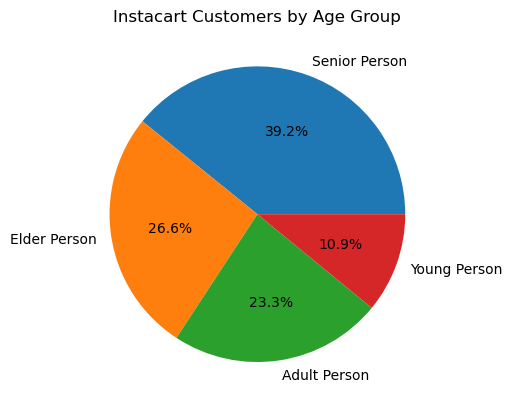

In [72]:
age_group_array = ([63723, 43250, 37894, 17766])
age_labels = ['Senior Person', 'Elder Person', 'Adult Person', 'Young Person']

plt.pie(age_group_array, autopct='%.1f%%', labels = age_labels)
plt.title('Instacart Customers by Age Group')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '05-31-2024 - df_instacart_age_group_pie.png'))
plt.show()

#### Income

In [48]:
# Creating pie chart for visualization

df_instacart_sample['income_flag'].value_counts(dropna = False)

income_flag
Upper middle class    53231
Higher class          45294
Lower middle class    38805
Middle class          25303
Name: count, dtype: int64

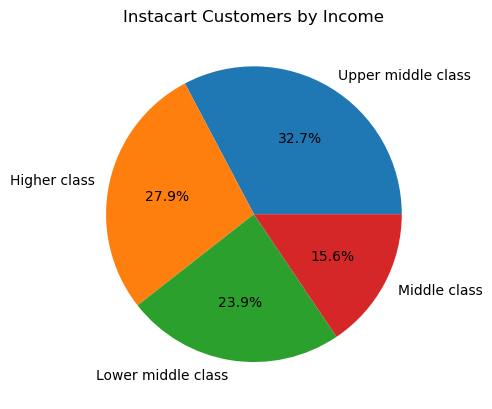

In [75]:
income_array = ([53231, 45294, 38805, 25303])
income_labels = ['Upper middle class', 'Higher class', 'Lower middle class', 'Middle class']

plt.pie(income_array, autopct='%.1f%%', labels = income_labels)
plt.title('Instacart Customers by Income')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '05-31-2024 - df_instacart_income_pie.png'))
plt.show()

#### Number of dependants

In [49]:
# Creating pie chart for visualization

df_instacart_sample['dependants_flag'].value_counts(dropna = False)

dependants_flag
There is dependants    121905
No dependants           40728
Name: count, dtype: int64

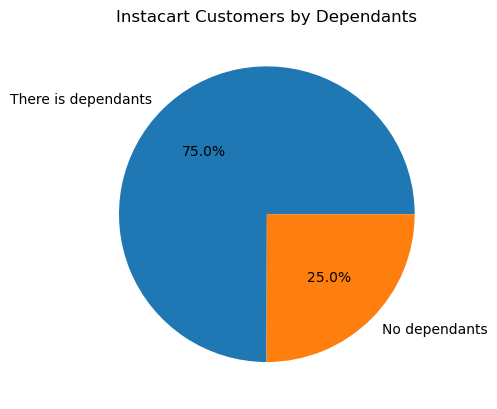

In [50]:
dependants_array = ([121905, 40728])
dependants_labels = ['There is dependants', 'No dependants']

plt.pie(dependants_array, autopct='%.1f%%', labels = dependants_labels)
plt.title('Instacart Customers by Dependants')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '05-31-2024 - df_instacart_dependants_pie.png'))
plt.show()

Step 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [54]:
# Creating aggregated subset of data where the 'prices' column is the total cost of each order:

aggregation_subset = df_instacart_not_exclude.groupby(['user_id', 'age_group_flag', 'income_flag', 'dependants_flag', 'loyalty_flag', 'region', 'days_since_last_order'])['prices'].sum().reset_index()

In [55]:
# Renaming 'prices' to 'order_total'

aggregation_subset.rename(columns = {'prices' : 'order_total'}, inplace = True)

In [57]:
#Checking subset

aggregation_subset

,user_id,age_group_flag,income_flag,dependants_flag,loyalty_flag,region,days_since_last_order,order_total
0,1,Adult Person,Lower middle class,There is dependants,New customer,South,0.0,40.2
1,1,Adult Person,Lower middle class,There is dependants,New customer,South,14.0,40.2
2,1,Adult Person,Lower middle class,There is dependants,New customer,South,15.0,35.4
3,1,Adult Person,Lower middle class,There is dependants,New customer,South,19.0,25.0
4,1,Adult Person,Lower middle class,There is dependants,New customer,South,20.0,29.0
...,...,...,...,...,...,...,...,...
1395892,206209,Elder Person,Higher class,There is dependants,Regular customer,Midwest,9.0,77.1
1395893,206209,Elder Person,Higher class,There is dependants,Regular customer,Midwest,18.0,131.5
1395894,206209,Elder Person,Higher class,There is dependants,Regular customer,Midwest,22.0,101.4
1395895,206209,Elder Person,Higher class,There is dependants,Regular customer,Midwest,29.0,64.7


#### Aggregate by age group

In [60]:
# max, min, mean by age group

agg_by_age_group = aggregation_subset.groupby('age_group_flag').agg({'days_since_last_order' : ['min', 'mean', 'max'], 
                                                                  'order_total' : ['min', 'mean', 'max']})
# Checking 

agg_by_age_group

days_since_last_order                  order_total              \
                                 min       mean   max         min        mean   
age_group_flag                                                                  
Adult Person                     0.0  12.621567  30.0         1.0  249.597058   
Elder Person                     0.0  12.579341  30.0         1.0  245.174635   
Senior Person                    0.0  12.608340  30.0         1.0  251.546039   
Young Person                     0.0  12.570455  30.0         1.0  263.613037   

                          
                     max  
age_group_flag            
Adult Person    500599.2  
Elder Person    301339.9  
Senior Person   401483.2  
Young Person    400359.8

#### Aggregate by Income

In [61]:
# max, min, mean by Income

agg_by_income = aggregation_subset.groupby('income_flag').agg({'days_since_last_order' : ['min', 'mean', 'max'],
                                                                        'order_total' : ['min', 'mean', 'max']})
# Check
agg_by_income

days_since_last_order                  order_total  \
                                     min       mean   max         min   
income_flag                                                             
Higher class                         0.0  12.506144  30.0         1.0   
Lower middle class                   0.0  12.898310  30.0         1.0   
Middle class                         0.0  12.506942  30.0         1.0   
Upper middle class                   0.0  12.519325  30.0         1.0   

                                          
                          mean       max  
income_flag                               
Higher class        441.465242  500599.2  
Lower middle class  122.942472   17181.3  
Middle class        177.480593   16343.8  
Upper middle class  210.423330  400705.7

#### Aggregate by dependants

In [62]:
# max, min, mean by dependants category
agg_by_dependants = aggregation_subset.groupby('dependants_flag').agg({'days_since_last_order' : ['min', 'mean', 'max'],
                                                                               'order_total' : ['min', 'mean', 'max']})
# Check
agg_by_dependants

days_since_last_order                  order_total  \
                                      min       mean   max         min   
dependants_flag                                                          
No dependants                         0.0  12.606314  30.0         1.0   
There is dependants                   0.0  12.597322  30.0         1.0   

                                           
                           mean       max  
dependants_flag                            
No dependants        253.868841  400705.7  
There is dependants  249.662424  500599.2

Step 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [65]:
# Importing department_id wrangled 

df_department = pd.read_csv(os.path.join(path, '02 Data','Prepared Data',
    'departments_wrangled.csv'))

In [67]:
df_department.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [68]:
# Dropping the column _merge

df_instacart_not_exclude = df_instacart_not_exclude.drop(columns = ['_merge'])

In [70]:
# Checking the drop

df_instacart_not_exclude.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'mean_prod_price',
       'spending_flag', 'median_days_last_order', 'frequency_flag', 'gender',
       'state', 'age', 'date_joined', 'number_dependants', 'marital_status',
       'income', 'region', 'exclude_flag', 'age_group_flag', 'income_flag',
       'dependants_flag'],
      dtype='object')

In [71]:
# Merging on department_id

instacart_complete = df_instacart_not_exclude.merge(df_department, on = 'department_id', indicator = True)

In [72]:
# Check frequency of new merge flag

instacart_complete['_merge'].value_counts(dropna = False)

_merge
both          30992664
left_only            0
right_only           0
Name: count, dtype: int64

In [73]:
# Exporting dataframe complete

instacart_complete.to_pickle(os.path.join(path, '02 Data', 'Prepared data', '06-02-2024 - instacart_complete.pkl'))

In [77]:
# Performing the crosstabs with age_group_flag and region

cross_region_age = pd.crosstab(df_instacart_sample['age_group_flag'], df_instacart_sample['region'], dropna = False)

In [79]:
cross_region_age

region,Midwest,Northeast,South,West
age_group_flag,,,,
Adult Person,8825,6725,12662,9682
Elder Person,10169,7580,14433,11068
Senior Person,15229,11230,21055,16209
Young Person,4154,3046,6044,4522


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

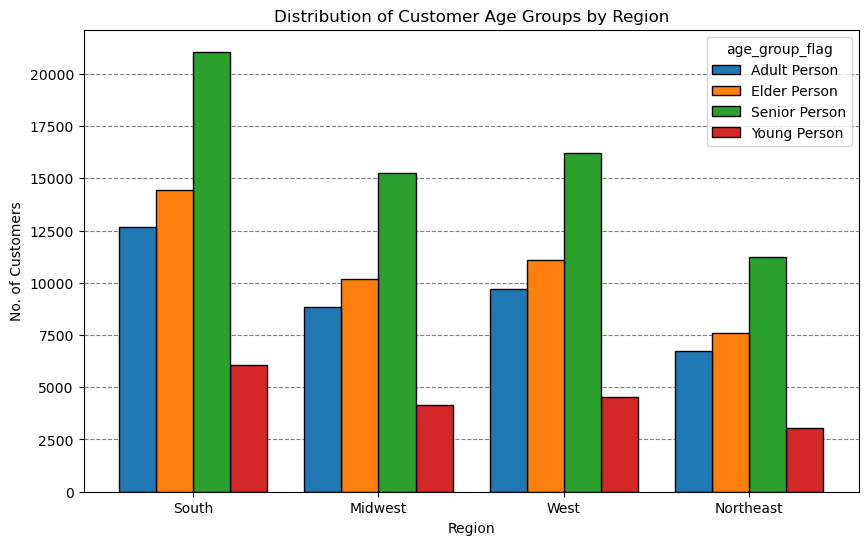

In [82]:
plt.figure(figsize=(10, 6))

# Plot the histogram bars
sns.histplot(data=df_instacart_sample, x='region', hue='age_group_flag', multiple='dodge', shrink=.8, alpha=1)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Customer Age Groups by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')

# Save and show
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_age_by_region.png'), bbox_inches = 'tight')
plt.show()

In [83]:
# Performing the crosstabs with region and income_flag

cross_income_region = pd.crosstab(df_instacart_sample['income_flag'], df_instacart_sample['region'], dropna = False)

In [84]:
cross_income_region

region,Midwest,Northeast,South,West
income_flag,,,,
Higher class,10839,8005,14922,11528
Lower middle class,9040,6790,12975,10000
Middle class,5985,4362,8461,6495
Upper middle class,12513,9424,17836,13458


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

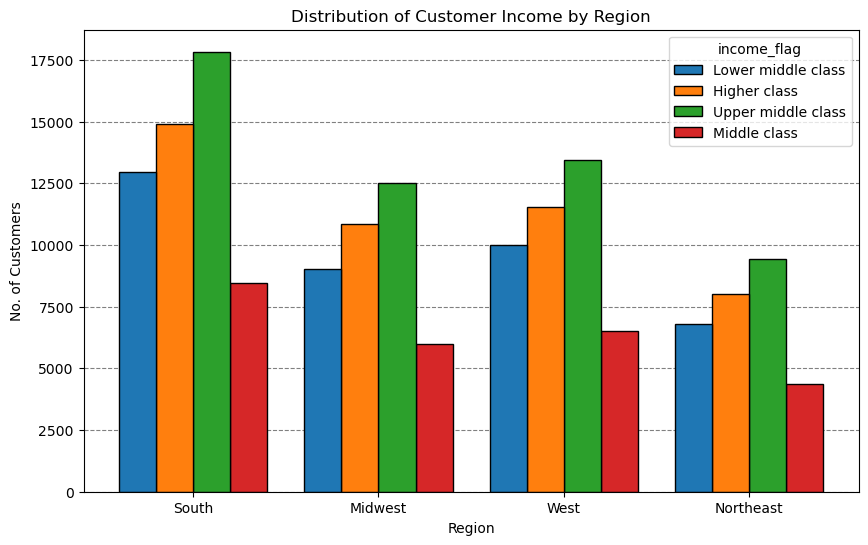

In [129]:
plt.figure(figsize=(10, 6))

# Plot the histogram bars
sns.histplot(data=df_instacart_sample, x='region', hue='income_flag', multiple='dodge', shrink=.8, alpha=1)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Customer Income by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')

# Save and show
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_income_by_region.png'), bbox_inches = 'tight')
plt.show()

In [86]:
# Performing the crosstabs with region and dependants_flag

cross_dependants_region = pd.crosstab(df_instacart_sample['dependants_flag'], df_instacart_sample['region'], dropna = False)

In [87]:
cross_dependants_region

region,Midwest,Northeast,South,West
dependants_flag,,,,
No dependants,9567,7255,13537,10369
There is dependants,28810,21326,40657,31112


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

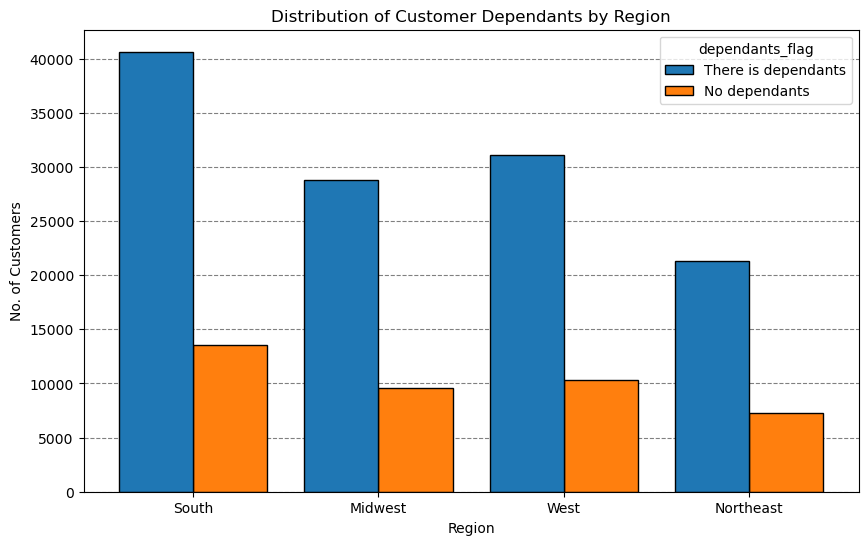

In [127]:
plt.figure(figsize=(10, 6))

# Plot the histogram bars
sns.histplot(data=df_instacart_sample, x='region', hue='dependants_flag', multiple='dodge', shrink=.8, alpha=1)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Customer Dependants by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')

# Save and show
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_dependants_by_region.png'), bbox_inches = 'tight')
plt.show()

In [91]:
# Group by income_group and department, count occurrences, and sort

income_dpt_counts = instacart_complete.groupby(['income_flag', 'department']).size().reset_index(name='counts')
income_dpt_counts.sort_values(by=['income_flag', 'counts'], ascending=False, inplace=True)

In [96]:
income_dpt_counts['income_flag'].value_counts()

income_flag
Upper middle class    21
Middle class          21
Lower middle class    21
Higher class          21
Name: count, dtype: int64

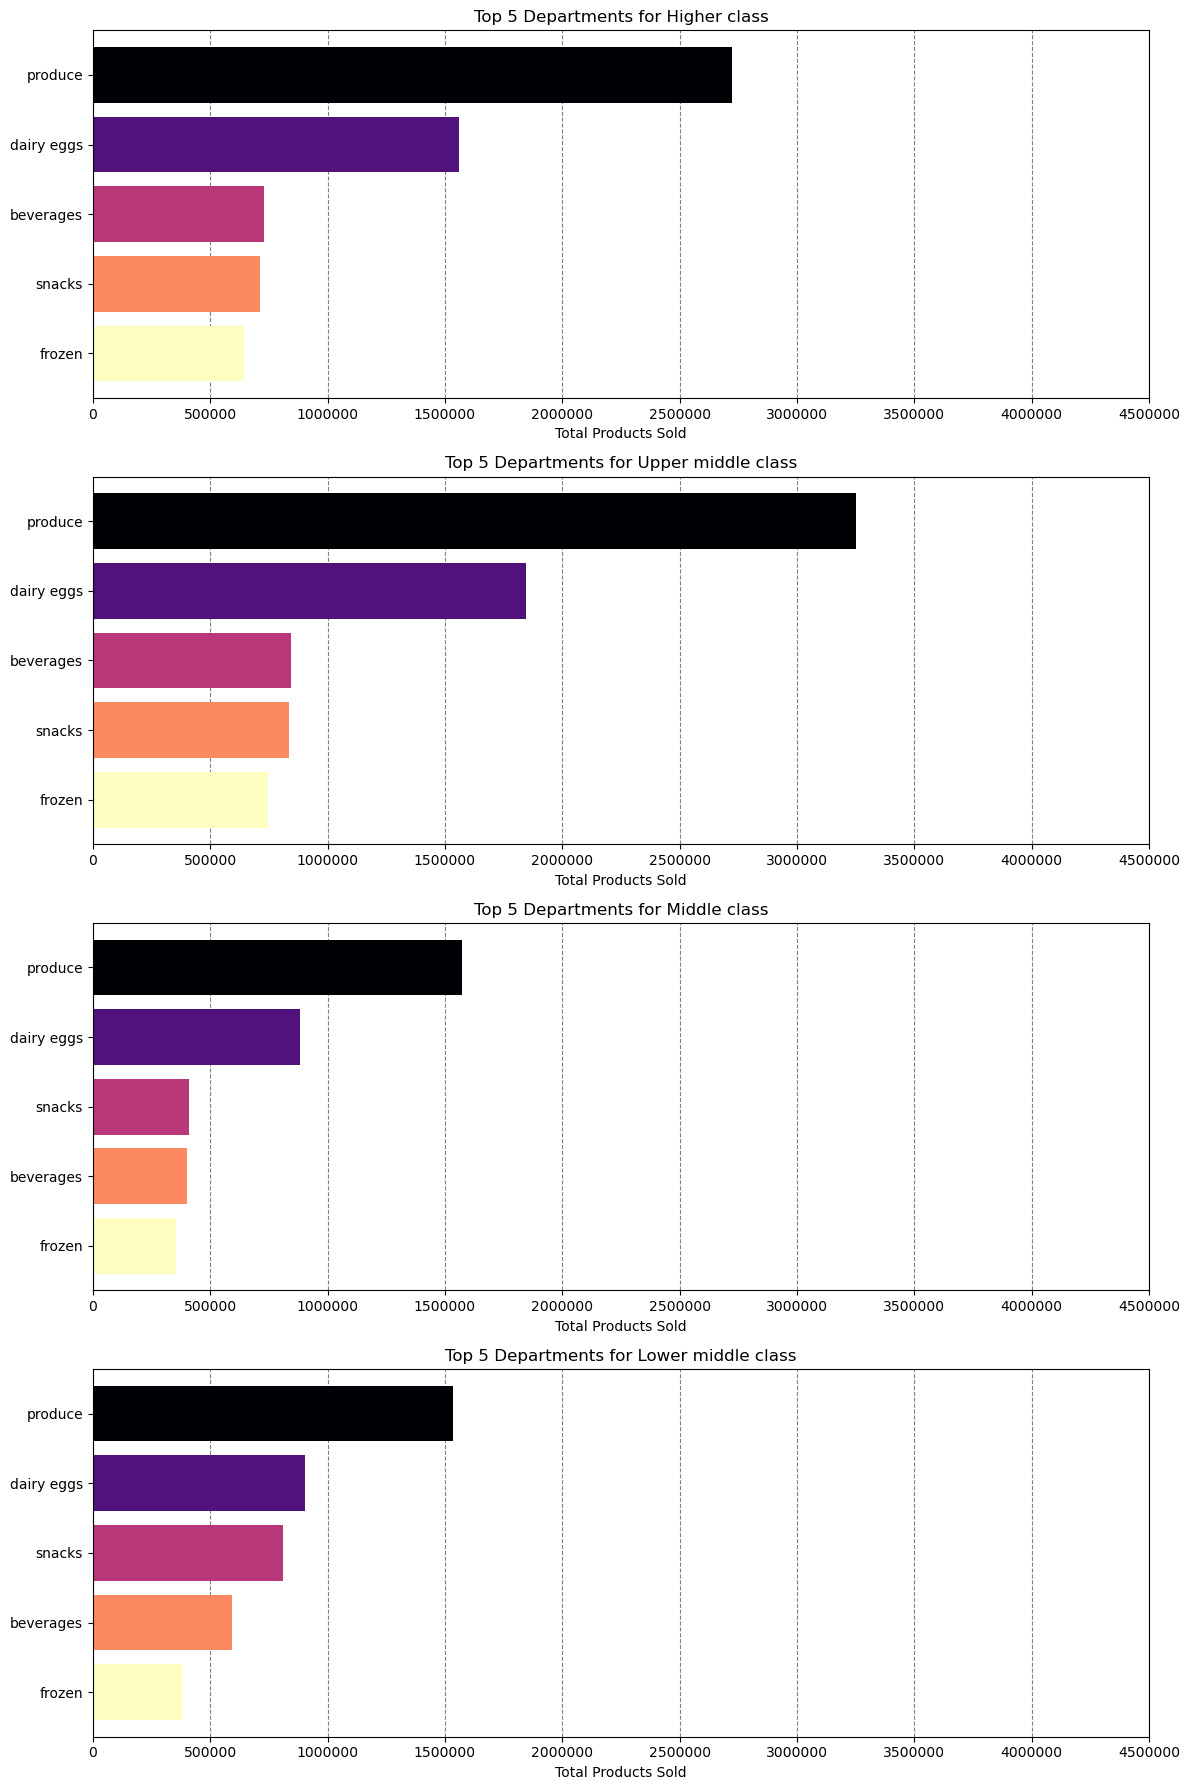

In [104]:
# Create subplots and color scheme
fig, axs = plt.subplots(4, 1, figsize=(12, 18))
colors = plt.cm.magma(np.linspace(0, 1, 5)) 

# Define the desired order of income groups
desired_order = ['Higher class', 'Upper middle class', 'Middle class', 'Lower middle class']

# Iterate over each income group and create a horizontal bar chart
for i, income_flag in enumerate(desired_order):
    income_data = income_dpt_counts[income_dpt_counts['income_flag'] == income_flag].head(5)
    ax = axs[i]
    ax.barh(income_data['department'], income_data['counts'], color=colors, zorder=2)
    ax.set_title(f'Top 5 Departments for {income_flag}')
    ax.set_xlabel('Total Products Sold')
    ax.set_xlim(0, 4500000) # Keep x-axis range consistent for comparisons
    ax.ticklabel_format(style='plain', axis='x')
    ax.set_ylabel('')
    ax.invert_yaxis()  # Invert y-axis to have the highest count at the top
    ax.grid(axis='x', color='gray', linestyle='dashed')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_top_departments_by_income_group.png'), bbox_inches = 'tight')
plt.show()

In [105]:
# Group by age_group and department, count occurrences, and sort
age_dpt_counts = instacart_complete.groupby(['age_group_flag', 'department']).size().reset_index(name='counts')
age_dpt_counts.sort_values(by=['age_group_flag', 'counts'], ascending=False, inplace=True)

In [107]:
age_dpt_counts['age_group_flag'].value_counts(dropna = False)

age_group_flag
Young Person     21
Senior Person    21
Elder Person     21
Adult Person     21
Name: count, dtype: int64

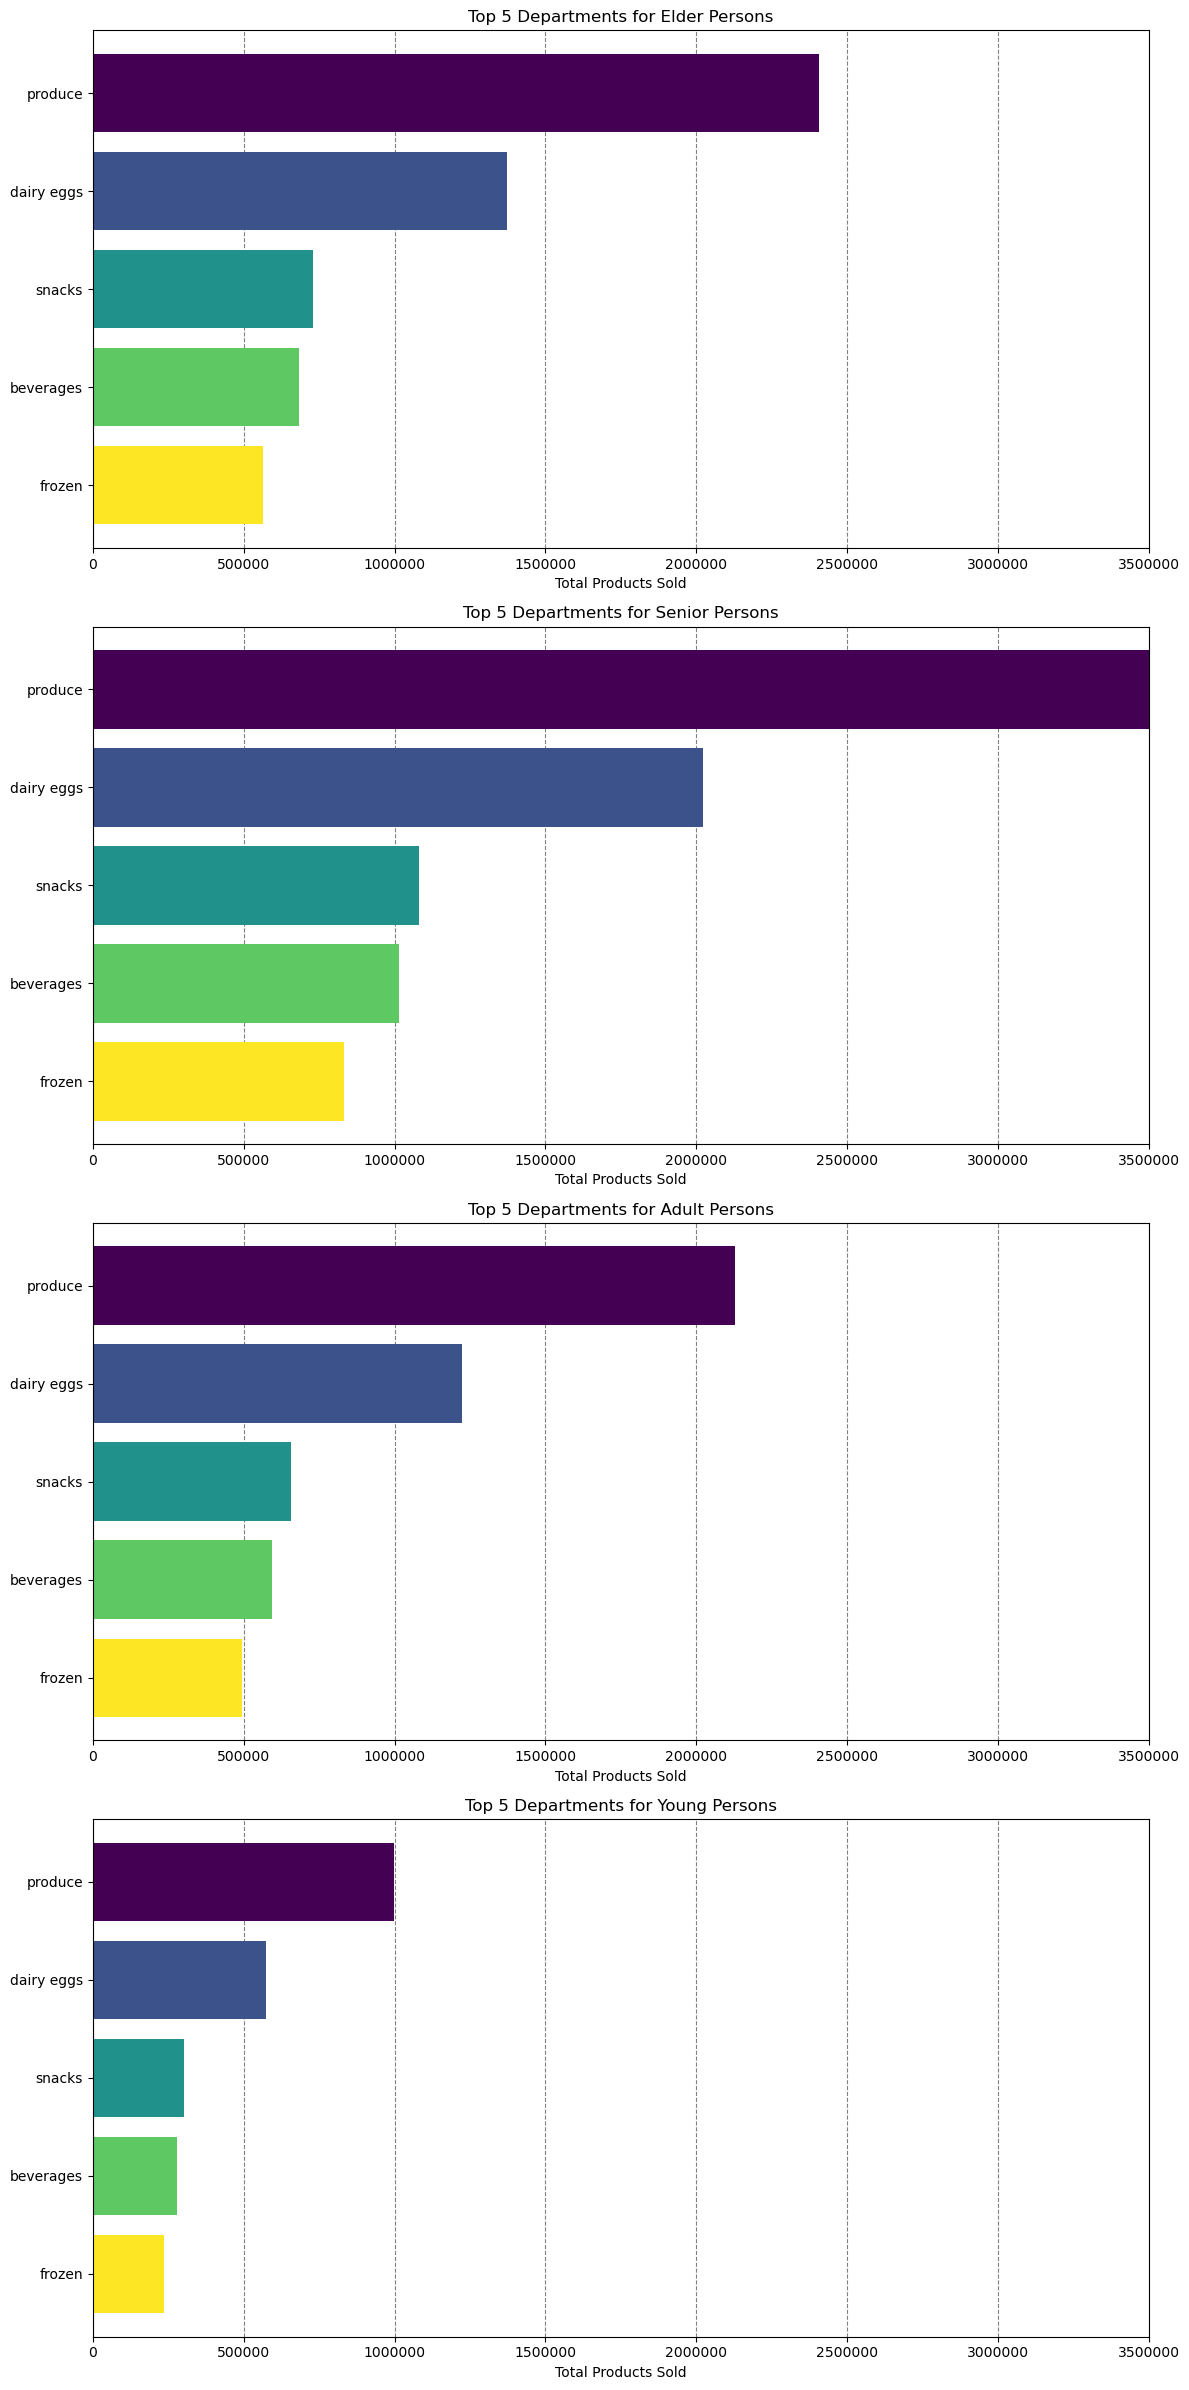

In [113]:
# Create subplots and color scheme
fig, axs = plt.subplots(4, 1, figsize=(12, 24))
colors = plt.cm.viridis(np.linspace(0, 1, 5))  # Sets colour palette

# Define the desired order of age groups
desired_age_order = ['Elder Person', 'Senior Person', 'Adult Person', 'Young Person']

# Iterate over each age group and create a horizontal bar chart
for i, age_group_flag in enumerate(desired_age_order):
    age_data = age_dpt_counts[age_dpt_counts['age_group_flag'] == age_group_flag].head(5)
    ax = axs[i]
    ax.barh(age_data['department'], age_data['counts'], color=colors, zorder=2)
    ax.set_title(f'Top 5 Departments for {age_group_flag}s')
    ax.set_xlabel('Total Products Sold')
    ax.set_xlim(0, 3500000) # Keep x-axis range consistent for comparisons
    ax.ticklabel_format(style='plain', axis='x')
    ax.set_ylabel('')
    ax.invert_yaxis()  # Invert y-axis to have the highest count at the top
    ax.grid(axis='x', color='gray', linestyle='dashed')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_top_departments_by_age_group.png'), bbox_inches = 'tight')
plt.show()

In [115]:
# Group by dependants_flag and department, count occurrences, and sort
dependants_dpt_counts = instacart_complete.groupby(['dependants_flag', 'department']).size().reset_index(name='counts')
dependants_dpt_counts.sort_values(by=['dependants_flag', 'counts'], ascending=False, inplace=True)

In [116]:
dependants_dpt_counts['dependants_flag'].value_counts(dropna = False)

dependants_flag
There is dependants    21
No dependants          21
Name: count, dtype: int64

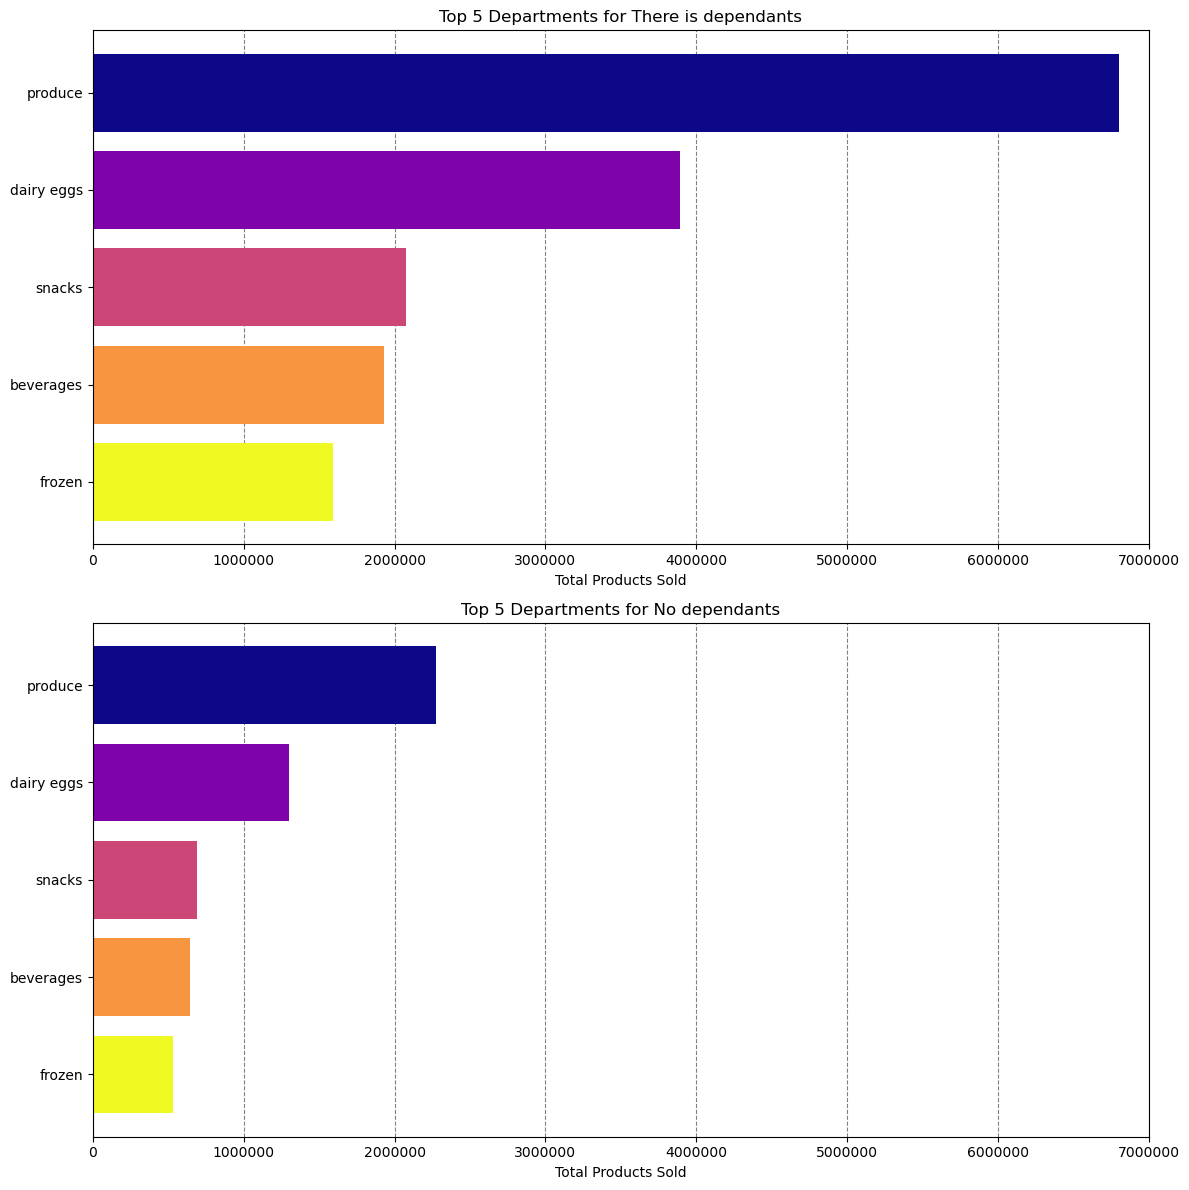

In [120]:
# Create subplots and color scheme
fig, axs = plt.subplots(2, 1, figsize=(12, 12))
colors = plt.cm.plasma(np.linspace(0, 1, 5))  # Sets colour palette

# Define the desired order of age groups
dependants_order = ['There is dependants', 'No dependants']

# Iterate over both dependants_flags and create a horizontal bar chart
for i, dependants_status in enumerate(dependants_order):
    dependants_data = dependants_dpt_counts[dependants_dpt_counts['dependants_flag'] == dependants_status].head(5)
    ax = axs[i]
    ax.barh(dependants_data['department'], dependants_data['counts'], color=colors, zorder=2)
    ax.set_title(f'Top 5 Departments for {dependants_status}')
    ax.set_xlabel('Total Products Sold')
    ax.set_xlim(0, 7000000) # Keep x-axis range consistent for comparisons
    ax.ticklabel_format(style='plain', axis='x')
    ax.set_ylabel('')
    ax.invert_yaxis()  # Invert y-axis to have the highest count at the top
    ax.grid(axis='x', color='gray', linestyle='dashed')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_top_departments_by_dependants.png'), bbox_inches = 'tight')
plt.show()

# Recommendations

In [121]:
instacart_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30992664 entries, 0 to 30992663
Data columns (total 37 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   eval_set                object  
 3   order_number            int64   
 4   orders_day_of_week      int64   
 5   order_hour_of_day       int64   
 6   days_since_last_order   float64 
 7   product_id              int64   
 8   add_to_cart_order       int64   
 9   reordered               int64   
 10  product_name            object  
 11  aisle_id                int64   
 12  department_id           int64   
 13  prices                  float64 
 14  price_range_loc         object  
 15  busiest_days            object  
 16  busiest_period_of_day   object  
 17  max_order               int64   
 18  loyalty_flag            object  
 19  mean_prod_price         float64 
 20  spending_flag           object  
 21  median

#### How Instacart customers are distributed among the US Regions?

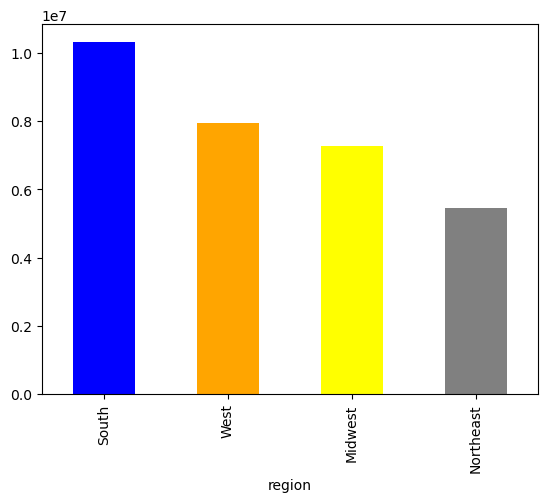

In [124]:
# Creating Bar Chart to answer this question
instacart_customer_regions = instacart_complete['region'].value_counts().plot.bar(color = ['blue', 'orange', 'yellow', 'gray'])

In [125]:
instacart_customer_regions.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_customer_regions.png'))

#### What are the top 5 departments and the low 5 departments for Instacart?

In [126]:
# Making a value count to review the data and determine the top 5 and low 5 departments
instacart_complete['department'].value_counts(dropna = False)

department
produce            9079276
dairy eggs         5191828
snacks             2766406
beverages          2571934
frozen             2123342
pantry             1782903
bakery             1125026
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699858
breakfast           678095
meat seafood        674785
personal care       424415
babies              410392
international       255991
alcohol             144674
pets                 93065
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

Top 5 - Produce, Dairy, Snacks, Beverages, Froze.
Low 5 - Bulk, Missing, Pets, Alcohol, International.